# Calculating the distance between the center of two active regions using SunPy coordinates

In [1]:
import drms
from astropy.io import fits as fits
from astropy.coordinates import SkyCoord
import astropy.units as u
import sunpy.coordinates

Now, let's query the JSOC database, where all the SDO data are stored, using the JSON API to retrieve both keywords and the location of the AIA chromospheric image files. The first step is to establish a connection to JSOC. This can be done with the `drms.Client()` class. [Here is](https://drms.readthedocs.io/en/stable/index.html) more information on how to download SDO data using the drms module.

In [2]:
import drms
c = drms.Client()

Now query the [Space-weather HMI Active Region Patches](http://link.springer.com/article/10.1007%2Fs11207-014-0529-3) (or SHARP) data in the Cylindrical Equal-Area map projection and the Carrington Heliographic coordinate system. The SHARP data include several patches, cut out from the full-disk image data, that encompass active regions. Here is an example of SHARP data for one day; each white bounding box, which is associated with a number (`HARPNUM`) and a time (`T_REC`), constitutes a unique SHARP record.

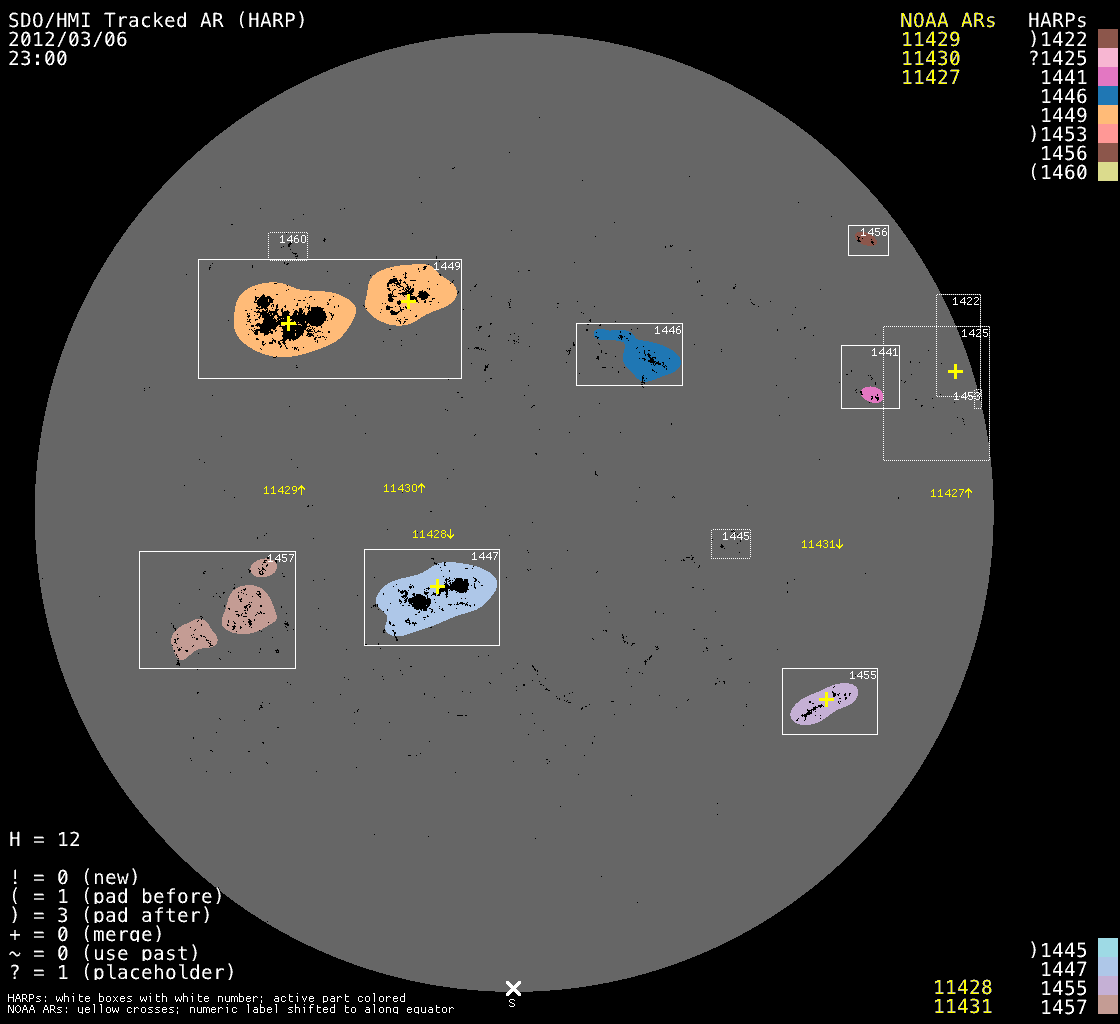

In [3]:
from IPython.display import Image
Image("http://jsoc.stanford.edu/doc/data/hmi/harp/harp_definitive/2012/03/06/harp.2012.03.06_23:00:00_TAI.png")

Here are the metadata keywords for two separate active regions, labeled with `HARPNUM` 1449 and 1447:

In [4]:
keys_1449 = c.query('hmi.sharp_cea_720s[1449][2012.03.06_23:00:00_TAI]', key=drms.const.all)
keys_1447 = c.query('hmi.sharp_cea_720s[1447][2012.03.06_23:00:00_TAI]', key=drms.const.all)

The `CRVAL1` and `CRVAL2` metadata keywords indicate the Carrington Heliographic longitude and latitude, in degrees, at the center of each patch.
* In the Carrington Heliographic coordinate system, the coordinate system is fixed to a sphere rotating with a constant period of 25.38 days (which is the average rotation rate of the Sun). 
* The coordinate system goes from +90 to -90 in latitude (i.e. from solar North to South) and from 0 to 360 in longtitude (where zero is at the central meridian).

Here are the coordinates of `HARPNUM` 1449 (displayed in a peach color above):

In [5]:
print(keys_1449.CRVAL1[0], keys_1449.CRVAL2[0])

304.674927 17.5305


We represent this in a SunPy [SkyCoord object](https://docs.sunpy.org/en/stable/code_ref/coordinates.html#frames-and-skycoord):

In [6]:
sc_1449 = SkyCoord(keys_1449.CRVAL1[0]*u.deg, keys_1449.CRVAL2[0]*u.deg, obstime=keys_1449.T_REC[0], frame="heliographic_carrington")

And do the same for another active region on the disk, `HARPNUM` 1447:

In [7]:
sc_1447 = SkyCoord(keys_1447.CRVAL1[0]*u.deg, keys_1447.CRVAL2[0]*u.deg, obstime=keys_1447.T_REC[0], frame="heliographic_carrington")

Finally, we calculate the distance between the two using the [AstroPy separation](https://docs.astropy.org/en/stable/coordinates/matchsep.html) method:

In [8]:
sep = sc_1449.separation(sc_1447)

We see that the separation is 37 degrees, 38 arcminutes, and 48.7182 arcseconds:

In [9]:
sep

<Angle 37.64686618 deg>